In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [ ]:
dataset = pd.read_csv('final_dataset.csv')
dataset

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [ ]:
grouped = dataset.groupby(['HomeTeam', 'AwayTeam'])

In [ ]:
# grouped.apply(print)
grouped.describe()
dataset.keys()

In [ ]:

# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )
dataset2.keys()
dataset2.head(10)

In [ ]:

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

Total number of matches: 6840
Number of features: 14
Number of matches won by home team: 3176
Win rate of home team: 46.43%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

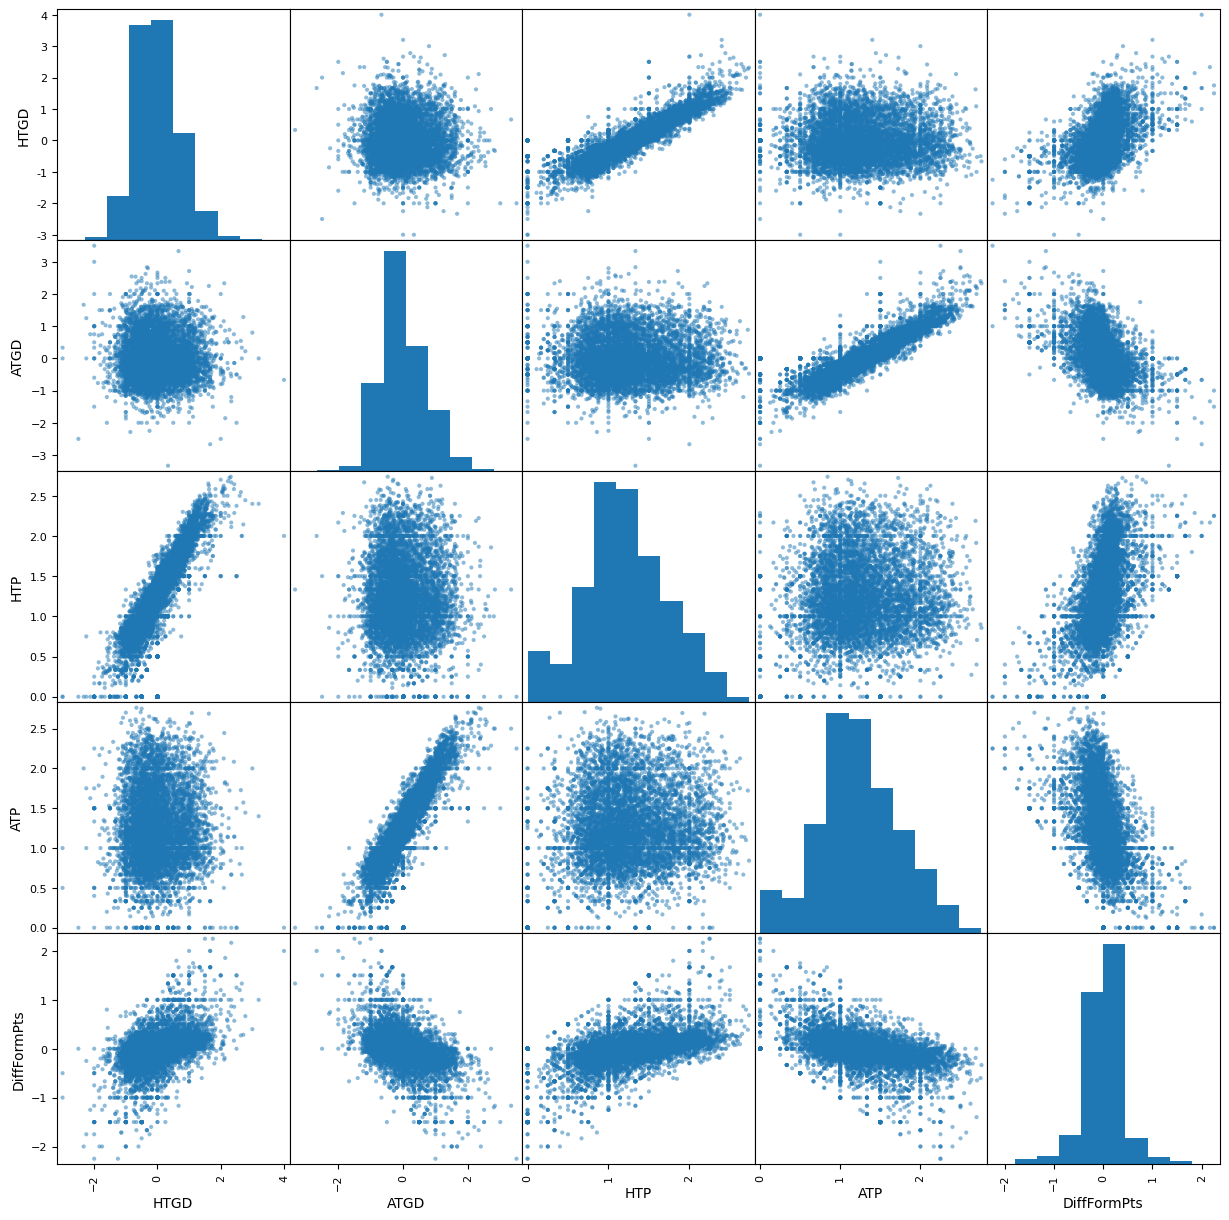

In [ ]:

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))
# Visualising distribution of data
from pandas.plotting import scatter_matrix

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [ ]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'],axis = 1)
y_all = dataset2['FTR']

In [ ]:






#what is the win rate for the home team?



Processed feature columns (32 total features):
['Unnamed: 0', 'FTHG', 'FTAG', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


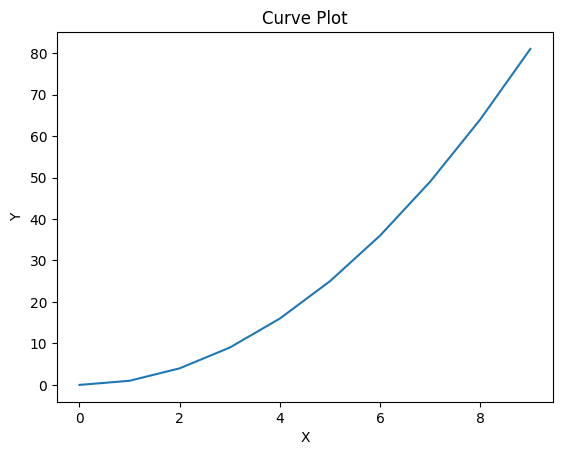

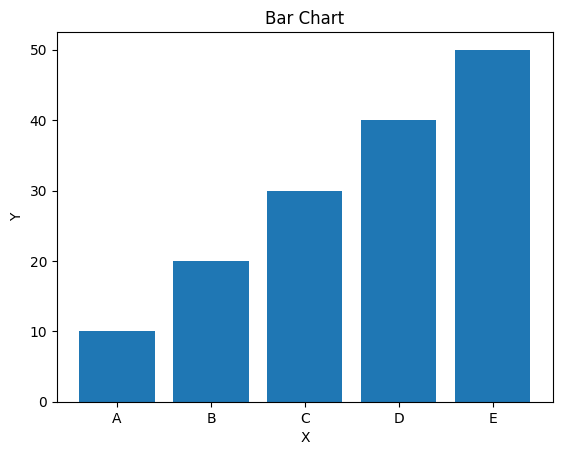

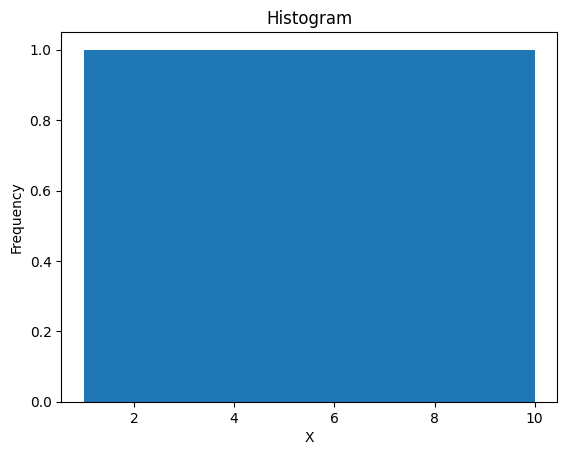

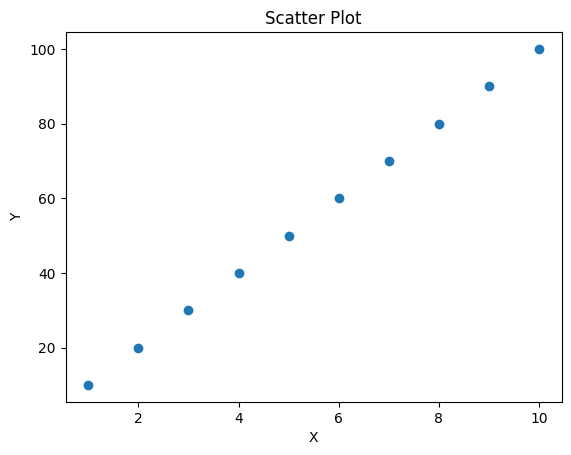

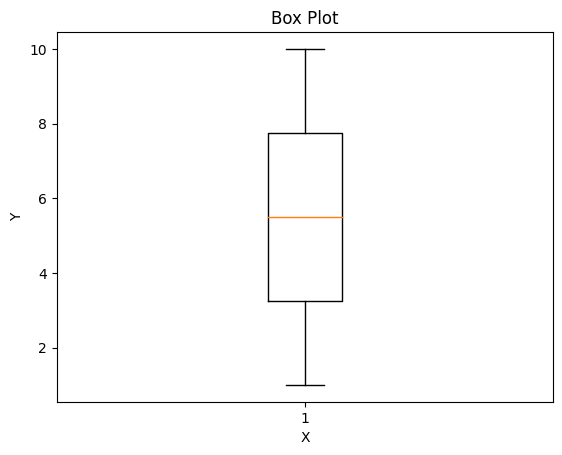

In [ ]:


# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['FTHG', 'FTAG','HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
import pandas as pd

def preprocess_features(X):
    ''' Preprocesses the football data and converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():  # Using items() instead of iteritems()
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)

        # Collect the revised columns
        output = output.join(col_data)

    return output

# Assuming X_all is your DataFrame
X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))
X_all.head(10)
dataset2.drop(['FTR'],axis=1)
# dataset2.drop(['FTR'],1)
dataset3 = dataset.copy().drop(columns =['FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )
dataset3
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = y_all)

# Plot a curve
x = range(10)
y = [i**2 for i in x]
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Plot')
plt.show()

# Plot a bar chart
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 20, 30, 40, 50]
plt.bar(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bar Chart')
plt.show()

# Plot a histogram
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(x)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()
# Plot a scatter plot
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()
# Plot a box plot
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.boxplot(x)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Box Plot')
plt.show()

# **Decision Tree**

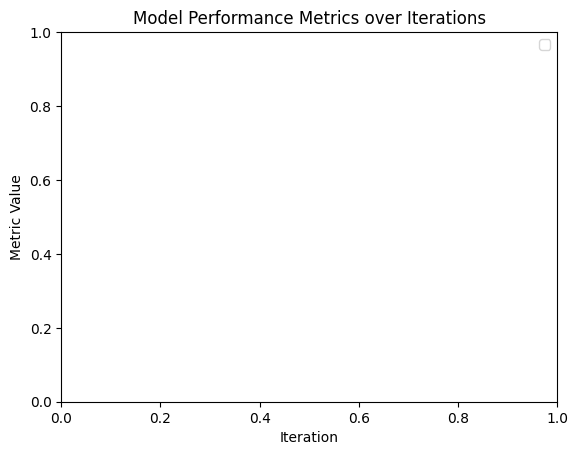

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           H       1.00      1.00      1.00       953
          NH       1.00      1.00      1.00      1099

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



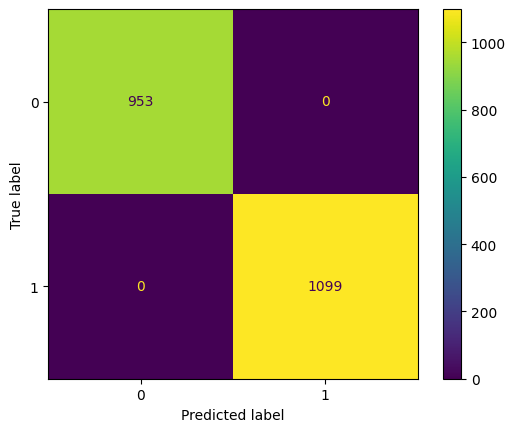

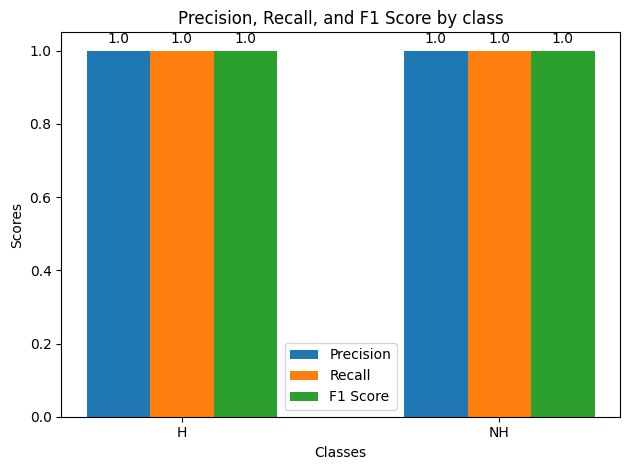

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ParameterGrid
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Custom cross-validation to collect metrics
cv = StratifiedKFold(n_splits=3)

for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    for params in ParameterGrid(param_grid):
        model = DecisionTreeClassifier(random_state=0, **params)
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)

        report = classification_report(y_test_cv, y_pred_cv, output_dict=True)

        accuracies.append(report['accuracy'])
        precisions.append(np.mean([report[label]['precision'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))
        recalls.append(np.mean([report[label]['recall'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))
        f1_scores.append(np.mean([report[label]['f1-score'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))

# Plot the metrics over iterations
iterations = range(len(accuracies))

plt.plot(iterations, accuracies, label="Accuracy")
plt.plot(iterations, precisions, label="Precision")
plt.plot(iterations, recalls, label="Recall")
plt.plot(iterations, f1_scores, label="F1 Score")

# Add labels and title
plt.xlabel("Iteration")
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics over Iterations")

# Add legend
plt.legend()

# Show the plot
plt.show()

# Now use GridSearchCV to find the best parameters and evaluate the final model
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Use the best model to make predictions
Y_pred = best_dt_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, Y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate accuracy, precision, recall, and F1 score for each class
report = classification_report(y_test, Y_pred, output_dict=True)

# Extract class labels
class_labels = list(report.keys())[:-3]

# Extract metrics
precision = [report[label]['precision'] for label in class_labels]
recall = [report[label]['recall'] for label in class_labels]
f1_score = [report[label]['f1-score'] for label in class_labels]

# Plot the metrics by class
x = np.arange(len(precision))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score by class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

# Function to add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


# **Decission Tree**

In [ ]:

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Create lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Custom cross-validation to collect metrics
cv = StratifiedKFold(n_splits=5)


In [ ]:

for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    for params in ParameterGrid(param_grid):
        # Handle compatibility of parameters
        if params['penalty'] == 'l1' and params['solver'] in ['lbfgs', 'saga']:
            continue

        model = LogisticRegression(random_state=3, **params, max_iter=100)
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)

        report = classification_report(y_test_cv, y_pred_cv, output_dict=True)

        accuracies.append(report['accuracy'])
        precisions.append(np.mean([report[label]['precision'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))
        recalls.append(np.mean([report[label]['recall'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))
        f1_scores.append(np.mean([report[label]['f1-score'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

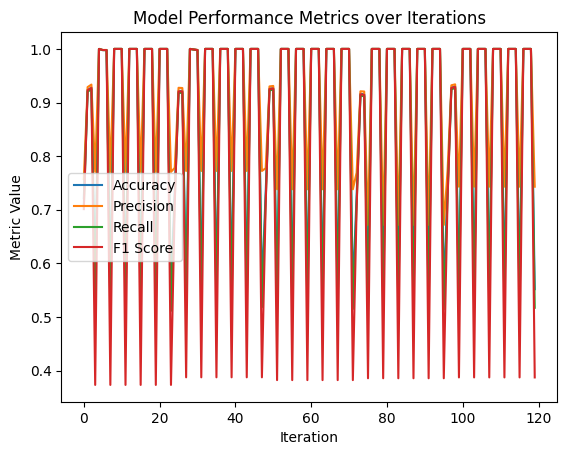

In [ ]:
# Plot the metrics over iterations
iterations = range(len(accuracies))

plt.plot(iterations, accuracies, label="Accuracy")
plt.plot(iterations, precisions, label="Precision")
plt.plot(iterations, recalls, label="Recall")
plt.plot(iterations, f1_scores, label="F1 Score")
# Add labels and title
plt.xlabel("Iteration")
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics over Iterations")
# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Now use GridSearchCV to find the best parameters and evaluate the final model
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=3, max_iter=100),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_lr_model = grid_search.best_estimator_

# Use the best model to make predictions
Y_pred = best_lr_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, Y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           H       1.00      1.00      1.00       953
          NH       1.00      1.00      1.00      1099

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

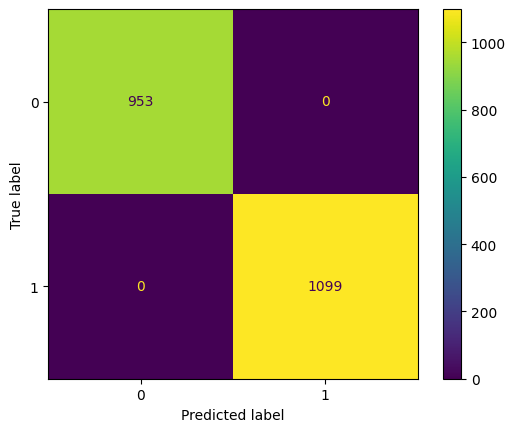

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

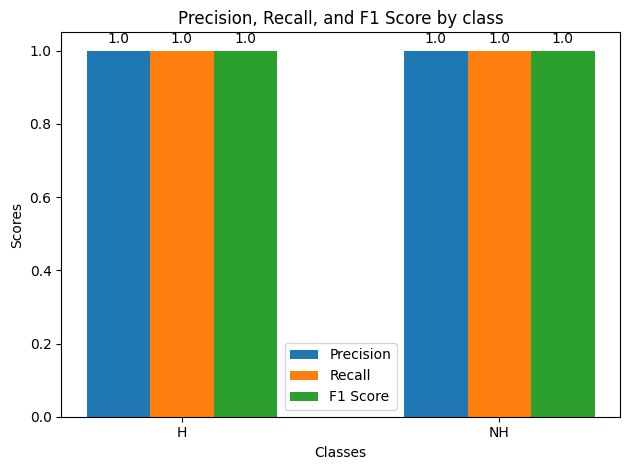

In [ ]:
# Calculate accuracy, precision, recall, and F1 score for each class
report = classification_report(y_test, Y_pred, output_dict=True)

# Extract class labels
class_labels = list(report.keys())[:-3]

# Extract metrics
precision = [report[label]['precision'] for label in class_labels]
recall = [report[label]['recall'] for label in class_labels]
f1_score = [report[label]['f1-score'] for label in class_labels]

# Plot the metrics by class
x = np.arange(len(precision))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score by class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

# Function to add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []


In [ ]:

# Custom cross-validation to collect metrics
cv = StratifiedKFold(n_splits=5)

for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    for params in ParameterGrid(param_grid):
        model = KNeighborsClassifier(**params)
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)

        report = classification_report(y_test_cv, y_pred_cv, output_dict=True)

        accuracies.append(report['accuracy'])
        precisions.append(np.mean([report[label]['precision'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))
        recalls.append(np.mean([report[label]['recall'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))
        f1_scores.append(np.mean([report[label]['f1-score'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]))


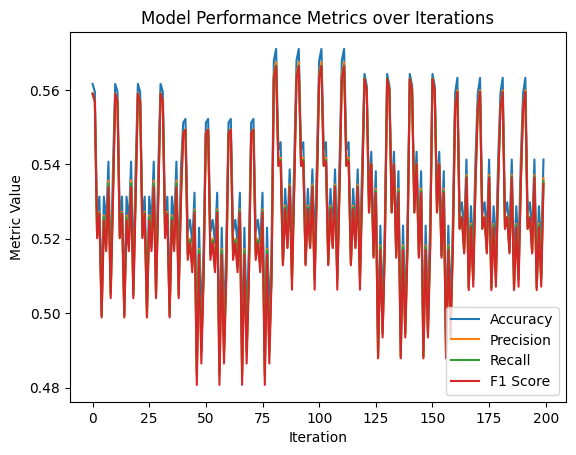

In [ ]:
# Plot the metrics over iterations
iterations = range(len(accuracies))

plt.plot(iterations, accuracies, label="Accuracy")
plt.plot(iterations, precisions, label="Precision")
plt.plot(iterations, recalls, label="Recall")
plt.plot(iterations, f1_scores, label="F1 Score")
# Add labels and title
plt.xlabel("Iteration")
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics over Iterations")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:


# Now use GridSearchCV to find the best parameters and evaluate the final model
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Use the best model to make predictions
Y_pred = best_knn_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, Y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           H       0.55      0.50      0.53       953
          NH       0.60      0.64      0.62      1099

    accuracy                           0.58      2052
   macro avg       0.57      0.57      0.57      2052
weighted avg       0.58      0.58      0.58      2052



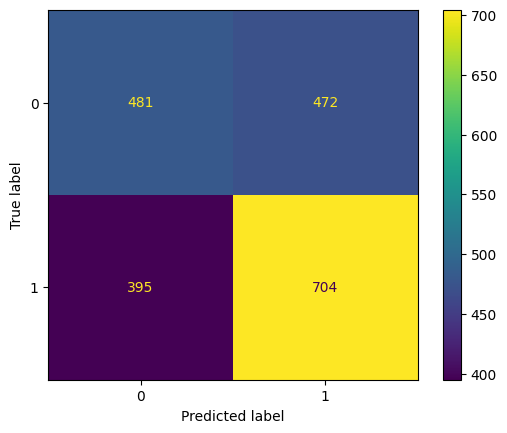

In [ ]:

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()



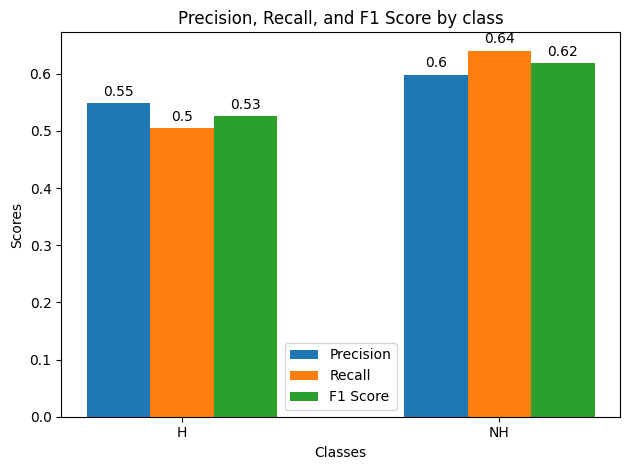

In [ ]:
# Calculate accuracy, precision, recall, and F1 score for each class
report = classification_report(y_test, Y_pred, output_dict=True)

# Extract class labels
class_labels = list(report.keys())[:-3]

# Extract metrics
precision = [report[label]['precision'] for label in class_labels]
recall = [report[label]['recall'] for label in class_labels]
f1_score = [report[label]['f1-score'] for label in class_labels]

# Plot the metrics by class
x = np.arange(len(precision))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score by class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

# Function to add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


Gussain NB
# **New Section**

In [58]:
from sklearn.naive_bayes import GaussianNB
# Fit the Gaussian Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.80      0.83      0.81       953
          NH       0.85      0.82      0.83      1099

    accuracy                           0.83      2052
   macro avg       0.82      0.83      0.82      2052
weighted avg       0.83      0.83      0.83      2052



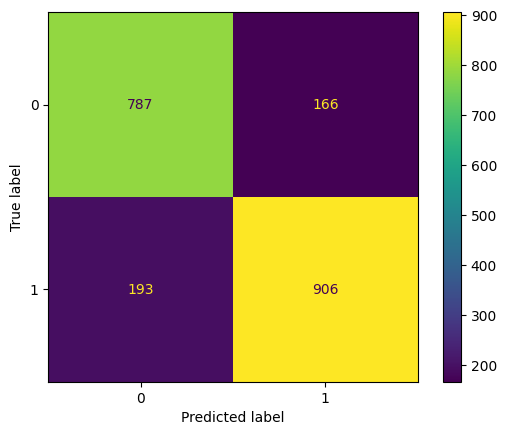

In [59]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


In [62]:
# Calculate accuracy, precision, recall, and F1 score for each class
report = classification_report(y_test, Y_pred, output_dict=True)
# Extract class labels
class_labels = list(report.keys())[:-3]
# Extract metrics
precision = [report[label]['precision'] for label in class_labels]
recall = [report[label]['recall'] for label in class_labels]
f1_score = [report[label]['f1-score'] for label in class_labels]

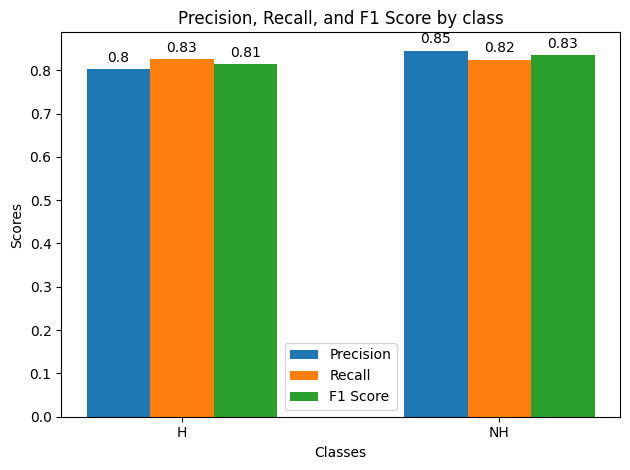

In [63]:
# Plot the metrics by class
x = np.arange(len(precision))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score by class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

# Function to add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


# **Implement test Class**

In [64]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_all is your target variable containing non-numeric values
label_encoder = LabelEncoder()
y_all_encoded = label_encoder.fit_transform(y_all)
y_train= label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
# Now y_all_encoded contains numeric labels


In [65]:
print("Unique classes in y_all_encoded:", set(y_all_encoded))

Unique classes in y_all_encoded: {0, 1}


In [66]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4788, 32)
y_train shape: (4788,)
X_test shape: (2052, 32)
y_test shape: (2052,)


In [67]:
import unittest
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

class TestXGBoostModel(unittest.TestCase):

    def setUp(self):
        # Load your dataset and split it into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_all, y_all_encoded, test_size=0.2, random_state=42)
        # Initialize XGBoost model with appropriate hyperparameters
        self.model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')

    def tearDown(self):
        # Clean up after each test case
        pass

    def test_prediction_accuracy(self):
    # Test model prediction accuracy
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = report['accuracy']
    # Check if accuracy is above a certain threshold
        self.assertTrue(accuracy > 0.8)

    def test_invalid_input(self):
        # Test model behavior with invalid input
        invalid_input = "invalid input"
        with self.assertRaises(ValueError):
            self.model.predict(invalid_input)

# Run the tests
unittest.main(argv=[''], verbosity=2, exit=False)


test_invalid_input (__main__.TestXGBoostModel) ... ok
test_prediction_accuracy (__main__.TestXGBoostModel) ... ok

----------------------------------------------------------------------
Ran 2 tests in 1.497s

OK


# **Flask APP**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField, FloatField
from flask import Flask, render_template, redirect, url_for, request, session
from flask_wtf.csrf import CSRFProtect
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
import random


# * Global variables
classifier = None
dataset = None
dataset2 = None
matches = None
chosen_data_matches = []
display_data = None
players_by_team = {}
X_train1 = []
rand_index = 0


def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    # for col, col_data in X.iteritems():
    for col, col_data in X.items():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        output = output.join(col_data)

    return output


def preprocess_features2(x_df):

    res = pd.DataFrame(columns=['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts'], index=[0])

    res['HTP'] = x_df['HTP']
    res['ATP'] = x_df['ATP']
    res['Unnamed: 0'] = x_df['Unnamed: 0']

    for prefix in ['HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3']:
        for suffix in ['W', 'L', 'M', 'D']:
            column_name = f"{prefix}_{suffix}"
            if column_name in x_df.columns:
                res[column_name] = True
            else:
                res[column_name] = False

    res['HTGD'] = x_df['HTGD']
    res['ATGD'] = x_df['ATGD']
    res['DiffFormPts'] = x_df['DiffFormPts']

    return res


def make_model(X_train1=None, pred=None):
    global classifier

    dataset = pd.read_csv('final_dataset.csv')

    dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
        'HTGS', 'ATGS', 'HTGC', 'ATGC',
        'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
        'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
        'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
        'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
        'DiffPts'] )

    X_all = dataset2.drop(['FTR'],axis=1)
    y_all = dataset2['FTR']


    # Appending new dataset
    if X_train1 != None:

        index1 = len(dataset2)
        X_train1 = [[index1] + X_train1]
        columns = ['Unnamed: 0', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD', 'ATGD', 'DiffFormPts']
        x_df = pd.DataFrame(X_train1, columns=columns)
        X_all = X_all = pd.concat([X_all, x_df], ignore_index=True)

        pred = 'H'
        pred_series = pd.Series(pred)
        y_all = y_all = pd.concat([y_all, pred_series], ignore_index=True)



    cols = [['HTGD','ATGD','HTP','ATP']]
    for col in cols:
        X_all[col] = scale(X_all[col])

    #last 3 wins for both sides
    X_all.HM1 = X_all.HM1.astype('str')
    X_all.HM2 = X_all.HM2.astype('str')
    X_all.HM3 = X_all.HM3.astype('str')
    X_all.AM1 = X_all.AM1.astype('str')
    X_all.AM2 = X_all.AM2.astype('str')
    X_all.AM3 = X_all.AM3.astype('str')


    X_all = preprocess_features(X_all)


    # Shuffle and split the dataset into training and testing set.
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                        test_size = 0.2,
                                                        random_state = 42,
                                                        stratify = y_all)

    # Fitting Logistic Regression to the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 2)
    classifier.fit(X_train, y_train)


def make_pred(X_train1):

    global classifier

    index = 0

    X_train1 = [ [index] + X_train1]

    columns = ['Unnamed: 0', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD', 'ATGD', 'DiffFormPts']

    x_df = pd.DataFrame(X_train1, columns=columns)

    x_df = preprocess_features(x_df)

    ans = preprocess_features2(x_df)

    pred = classifier.predict(ans)

    return pred[0]


def work():

    global dataset, dataset2, matches, players_by_team, display_data
    dataset = pd.read_csv('final_dataset.csv')

    dataset2 = dataset.copy().drop(columns =['FTR', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

    display_data = dataset[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP',
       'HTFormPts', 'ATFormPts', 'HM1', 'AM1', 'HM2', 'AM2', 'HM3', 'AM3',
       'HTWinStreak3', 'ATWinStreak3', 'HTLossStreak3', 'ATLossStreak3',
       ]].copy()

    display_data = display_data.values.tolist()


    matches_df = dataset[['HomeTeam', 'AwayTeam']].copy()
    matches = [tuple(x) for x in matches_df.to_records(index=False)]


    df = pd.read_csv('Premier League Player Stats.csv')

    for index, row in df.iterrows():
        team = row['TEAM'].lower()
        player = row['PLAYER']

        if team in players_by_team:
            players_by_team[team].append(player)
        else:
            players_by_team[team] = [player]

    new_names = {'wolverhampton wanderers' : 'wolves', 'brighton and hove albion' : 'brighton', 'leicester city': 'leicester', 'manchester city': 'man city', 'tottenham hotspur':'tottenham', 'manchester united':'man united', 'norwich city':'norwich', 'west ham united': 'west ham', 'newcastle united':'newcastle'}

    players_by_team = {new_names.get(old_key, old_key): value for old_key, value in players_by_team.items()}


    players_by_team['birmingham'] = ["John Smith","Michael Johnson","Christopher Brown","Daniel Davis","David Martinez","Joseph Anderson","James Taylor","Robert Hernandez","William Gonzalez","Richard Wilson","Thomas Moore","Matthew Miller"]
    players_by_team['blackburn'] = ["Benjamin Thompson","Lucas Rodriguez","Nathan Wright","Samuel Martinez","Oliver Harris","Alexander Nelson","William Carter","Henry Mitchell","Ethan Lopez","Daniel Taylor","James Scott","Jacob King"]
    players_by_team['blackpool'] = ["Michael Johnson", "David Anderson", "Christopher Martinez","Matthew Turner", "Joseph Wilson", "Andrew Garcia","Daniel Lee", "Ryan Rodriguez", "Tyler Hernandez","John Smith", "Robert Brown", "Joshua Jones"]
    players_by_team['bolton'] = [ "Kevin Thompson", "Brian Harris", "Anthony Martinez", "Justin Clark", "Steven Adams", "Brandon Lewis", "Eric Hall", "Adam White", "James Robinson", "Thomas Moore", "William Taylor", "Charles Jackson"]
    players_by_team['bradford'] = ["Michael Johnson", "Christopher Brown", "Matthew Davis", "Daniel Miller", "Mark Wilson", "Richard Garcia", "Joseph Rodriguez", "David Martinez", "Anthony Hernandez", "Paul Lopez", "Andrew Gonzalez", "Joshua Young"]
    players_by_team['cardiff'] = ["Jason Thompson", "Brian Lewis", "Kevin Scott", "Justin Green", "Brandon Hall", "Eric King", "Steven White", "Adam Adams", "Ryan Harris", "Thomas Clark", "Jeffrey Baker", "Gary Turner"]
    players_by_team['charlton'] = ["Christopher Martinez", "Matthew Robinson", "Anthony Wright", "Daniel Lopez", "Kenneth Lee", "George Walker", "Ronald Perez", "Edward Hall", "James Gonzalez", "Timothy Young", "Joshua Martinez", "Michael Rodriguez"]
    players_by_team['coventry'] = ["Brian Foster", "Thomas Martinez", "David Scott", "Steven Nelson", "Charles King", "Joseph Harris", "Paul Wright", "Mark Martinez", "Donald Miller", "Jason Rodriguez", "Jeffrey Clark", "Kevin Lewis"]
    players_by_team['derby'] = ["Robert Johnson", "Michael Brown", "William Davis", "Richard Wilson", "James Taylor", "John Anderson", "Thomas Thomas", "Daniel Jackson", "Matthew White", "Christopher Harris", "Joseph Martin", "David Thompson"]
    players_by_team['fulham'] = ["Andrew Clark", "Ryan Martinez", "Kevin Lewis", "Jeffrey Lee", "Brian Walker", "Timothy Hall", "Jason Young", "Eric Allen", "Steven Hernandez", "Scott King", "Justin Wright", "Brandon Hill"]
    players_by_team['huddersfield'] = ["Christopher Martinez", "Matthew Lopez", "Daniel Taylor", "James Martinez", "David Thomas", "Brian Garcia", "Jose Rodriguez", "William Hernandez", "Anthony Martinez", "Michael Rodriguez", "Charles Martinez", "Joseph Rodriguez"]
    players_by_team['hull'] = ['Jessica Green', 'Michael Scott', 'Emily Johnson', 'Justin White', 'Megan Lee', 'Kevin Martinez', 'Rachel Davis', 'Tyler Wilson', 'Olivia Thompson', 'Daniel Harris', 'Lauren Turner', 'Matthew Clark']
    players_by_team['ipswich'] = ['Sarah Adams', 'Ryan Parker', 'Amanda Miller', 'Brandon Mitchell', 'Jennifer Taylor', 'Christopher Brown', 'Stephanie Anderson', 'Andrew Martinez', 'Elizabeth Thomas', 'David Garcia', 'Rebecca Rodriguez', 'John Jackson']
    players_by_team['leeds'] = ['Michael Wilson', 'Jessica Lee', 'Matthew Harris', 'Lauren Martinez', 'Daniel Thompson', 'Ashley Clark', 'Christopher Walker', 'Emily Rodriguez', 'Joshua White', 'Michelle Scott', 'Nicholas Lewis', 'Sarah Hall']
    players_by_team['middlesboro'] = ['Alexis Johnson', 'Brandon Taylor', 'Olivia Thomas', 'Jacob Moore', 'Ava Garcia', 'Ethan Martinez', 'Sophia Anderson', 'William Brown', 'Mia Wilson', 'James Davis', 'Charlotte Miller', 'Daniel Rodriguez']
    players_by_team['middlesbrough'] = ['Elijah Clark', 'Amelia Young', 'Michael Scott', 'Emily White', 'Ryan Lewis', 'Avery King', 'Lucas Turner', 'Madison Hill', 'Logan Adams', 'Harper Carter', 'Jackson Wright', 'Evelyn Lopez']
    players_by_team['portsmouth'] = ['Emma Martinez', 'William Johnson', 'Olivia Brown', 'James Wilson', 'Isabella Anderson', 'Daniel Thompson', 'Sophia Harris', 'Alexander Davis', 'Mia Rodriguez', 'Benjamin Martinez', 'Charlotte Taylor', 'Jacob Garcia']
    players_by_team['qpr'] = ['Liam Smith', 'Emma Johnson', 'Noah Williams', 'Olivia Brown', 'William Jones', 'Ava Davis', 'James Wilson', 'Sophia Miller', 'Alexander Taylor', 'Isabella Moore', 'Ethan Anderson', 'Charlotte White']
    players_by_team['reading'] = ['Oliver Martinez', 'Sophia Taylor', 'Liam Johnson', 'Emma Brown', 'Noah Garcia', 'Olivia Rodriguez', 'William Hernandez', 'Ava Martinez', 'James Lopez', 'Isabella Perez', 'Ethan Gonzalez', 'Charlotte Moore']
    players_by_team['stoke'] = ['Elijah Anderson', 'Amelia Martinez', 'James Johnson', 'Olivia Brown', 'William Garcia', 'Charlotte Wilson', 'Michael Rodriguez', 'Ava Hernandez', 'Alexander Lopez', 'Sophia Perez', 'Daniel Gonzalez', 'Mia Moore']
    players_by_team['sunderland'] = ['Liam Taylor', 'Emma Thomas', 'Noah White', 'Olivia Harris', 'William Clark', 'Ava Lewis', 'James Turner', 'Isabella Baker', 'Logan Hall', 'Sophia Wright', 'Benjamin Hill', 'Emily Parker']
    players_by_team['swansea'] = ['Jacob Johnson', 'Sophia Martinez', 'Mason Anderson', 'Ava Taylor', 'William Jackson', 'Isabella Thompson', 'James Harris', 'Olivia Nelson', 'Benjamin White', 'Charlotte Martinez', 'Elijah Robinson', 'Amelia Lewis']
    players_by_team['west brom'] = ['Liam Brown', 'Emma Rodriguez', 'Noah Garcia', 'Olivia Martinez', 'William Lopez', 'Ava Wilson', 'James Martinez', 'Isabella Robinson', 'Oliver Clark', 'Sophia Walker', 'Benjamin Young', 'Mia Hernandez']
    players_by_team['wigan'] = ['Ethan Taylor', 'Amelia Lewis', 'Michael White', 'Sophia Thompson', 'Alexander Hall', 'Ava Garcia', 'William Martin', 'Olivia Martinez', 'James Robinson', 'Isabella Johnson', 'Benjamin Brown', 'Mia Davis']


# ! Flask App
app = Flask(__name__)
csrf = CSRFProtect(app)
app = Flask(__name__)
app.secret_key = 'your_secret_key'
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///users.db'
db = SQLAlchemy(app)


class MyForm(FlaskForm):
    data1 = FloatField('Data 1')
    data2 = FloatField('Data 2')
    data3 = StringField('Data 3')
    data4 = StringField('Data 4')
    data5 = StringField('Data 5')
    data6 = StringField('Data 6')
    data7 = StringField('Data 7')
    data8 = StringField('Data 8')
    data9 = FloatField('Data 9')
    data10 = FloatField('Data 10')
    data11 = FloatField('Data 11')
    pred = StringField('pred')
    submit = SubmitField('Submit')


class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(80), unique=True, nullable=False)
    password = db.Column(db.String(120), nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False)


class Comment(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    content = db.Column(db.Text, nullable=False)
    match_index = db.Column(db.Integer, nullable=False)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)
    user = db.relationship('User', backref=db.backref('comments', lazy=True))
    timestamp = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)


with app.app_context():
    db.create_all()


@app.route('/')
def index():
    global chosen_data_matches, display_data, matches, rand_index

    if 'username' in session:
        match_data = [(index, match) for index, match in enumerate( matches[ rand_index : rand_index+5 ] )]
        chosen_data_matches = display_data[ rand_index : rand_index+5 ]
        return render_template('index.html', match_data=match_data)
    else:
        return redirect(url_for('login'))


@app.route('/add_comment/<int:match_index>', methods=['POST'])
def add_comment(match_index):
    if 'username' in session:
        content = request.form['content']
        user = User.query.filter_by(username=session['username']).first()
        if content:
            new_comment = Comment(content=content, user=user, match_index=match_index)
            db.session.add(new_comment)
            db.session.commit()

    return redirect(url_for('show_match_data', match_index=match_index))


@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        email = request.form['email']
        if username and password and email:
            # Check if the username already exists
            existing_user = User.query.filter_by(username=username).first()
            if existing_user:
                return render_template('register.html', error='Username already exists. Please choose a different username.')
            else:
                # Check if the email already exists
                existing_email = User.query.filter_by(email=email).first()
                if existing_email:
                    return render_template('register.html', error='Email already exists. Please choose a different email.')
                else:
                    # Create the new user
                    new_user = User(username=username, password=password, email=email)
                    db.session.add(new_user)
                    db.session.commit()
                    session['username'] = username
                    return redirect(url_for('index'))
    return render_template('register.html')


@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username_or_email = request.form['username_or_email']  # Retrieve username or email from form
        password = request.form['password']
        # Check if the input is an email or username
        if '@' in username_or_email:
            user = User.query.filter_by(email=username_or_email).first()  # Check if email exists
        else:
            user = User.query.filter_by(username=username_or_email).first()  # Check if username exists

        if user and user.password == password:
            session['username'] = user.username
            return redirect(url_for('index'))
    return render_template('login.html')
@app.route('/signin', methods=['GET'])
def signin():

    if request.method == 'POST':
        username_or_email = request.form['username_or_email']  # Retrieve username or email from form
        password = request.form['password']
        # Check if the input is an email or username
        if '@' in username_or_email:
            user = User.query.filter_by(email=username_or_email).first()  # Check if email exists
        else:
            user = User.query.filter_by(username=username_or_email).first()  # Check if username exists

        if user and user.password == password:
            session['username'] = user.username
            return redirect(url_for('index'))
    return render_template('signin.html')


@app.route('/logout')
def logout():
    session.pop('username', None)
    return redirect(url_for('login'))


@app.route('/match/<int:match_index>', methods=['GET', 'POST'])
def show_match_data(match_index):
    global chosen_data_matches, X_train1, display_data, rand_index

    if chosen_data_matches == []:
        chosen_data_matches = display_data[ rand_index : rand_index+5 ]

    dataset2_values = dataset2.values.tolist()[match_index]
    comments = Comment.query.filter_by(match_index=match_index).order_by(Comment.timestamp.desc()).all()
    form = MyForm()

    if form.validate_on_submit():

        X_train = [ (form.data1.data) ,  (form.data2.data) ,  (form.data3.data) ,  (form.data4.data) ,  (form.data5.data) ,  (form.data6.data) ,  (form.data7.data) ,  (form.data8.data) ,  (form.data9.data) ,  (form.data10.data) ,  (form.data11.data) ]
        X_train1 = X_train
        pred = make_pred(X_train)

        return render_template('match_data2.html', pred=pred, dataset2_values=dataset2_values, form=form, comments=comments, match_index=match_index, players_by_team=players_by_team, display_data=chosen_data_matches[match_index])

    return render_template('match_data.html', dataset2_values=dataset2_values, form=form, comments=comments, match_index=match_index, players_by_team=players_by_team, display_data=chosen_data_matches[match_index])


@app.route('/refresh', methods=['GET', 'POST'])
def refresh():
    global rand_index

    rand_index = random.randint( 0, (len(matches)-6) )

    return redirect(url_for('index'))


@app.route('/clear_form', methods=['POST'])
def clear_form():
    global msg, X_train1
    msg = 'New Data Fitted!'
    form = MyForm()

    if form.validate_on_submit():

        if X_train1 == []:
            X_train1 = [ (form.data1.data) ,  (form.data2.data) ,  (form.data3.data) ,  (form.data4.data) ,  (form.data5.data) ,  (form.data6.data) ,  (form.data7.data) ,  (form.data8.data) ,  (form.data9.data) ,  (form.data10.data) ,  (form.data11.data) ]

        make_model(X_train1, form.pred.data) # Retrain the model

    print('\n', msg, '\n')

    return redirect(url_for('index'))


@app.route('/clear_form2', methods=['POST'])
def clear_form2():

    return redirect(url_for('index'))


if __name__ == '__main__':

    make_model()
    work()

    rand_index = random.randint( 0, (len(matches)-6) )

    app.run(debug=True)

